In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the AUC results
auc_df = pd.read_csv("auc_scores_with_rf_kappa_thresholding_detailed.csv")
auc_df["Random_AUCPR"] = auc_df["Total Actives Test"]/(auc_df["Total Inactives Test"] + auc_df["Total Actives Test"])

# Group by Task (Assay) and Feature Set to compute summary statistics
summary_stats = auc_df.groupby(["Task", "Feature Set"])["AUC"].agg(["mean", "std", "count"]).reset_index()


# Compare the overall performance across feature sets
overall_comparison = auc_df.groupby("Feature Set")["AUC"].agg(["mean", "std"]).reset_index()


In [35]:
auc_df

,Feature Set,Fold,Task,AUC,Optimal Threshold,Optimal Kappa,Kappa,Kappa @ 0.50,Balanced Accuracy,AUCPR,...,FN,Total Actives Train,Total Inactives Train,Total Compounds Train,Total Actives Test,Total Inactives Test,Total Compounds Test,Scrambled Kappa,Scrambled Balanced Accuracy,Random_AUCPR
0,CellCount,1,CHEMBL1741321,0.651461,0.535354,0.203941,0.246152,0.143673,0.636576,0.365656,...,32,147,393,540,74,197,271,0.000000,0.500000,0.273063
1,CellCount,2,CHEMBL1741321,0.532126,0.535354,0.245924,0.041028,-0.017304,0.521487,0.311206,...,48,148,393,541,73,197,270,0.000000,0.500000,0.270370
2,CellCount,3,CHEMBL1741321,0.666506,0.525253,0.182060,0.283864,0.165176,0.658646,0.409098,...,29,147,394,541,74,196,270,0.000000,0.500000,0.274074
3,CellProfiler,1,CHEMBL1741321,0.699479,0.383838,0.232955,0.282106,0.148105,0.633317,0.500803,...,43,147,393,540,74,197,271,-0.007335,0.497462,0.273063
4,CellProfiler,2,CHEMBL1741321,0.576038,0.404040,0.268048,0.139836,0.143992,0.571727,0.404801,...,44,148,393,541,73,197,270,0.007940,0.503268,0.270370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,CellCount,2,CHEMBL5291899,0.504545,0.535354,0.176849,-0.008403,0.007299,0.495455,0.296937,...,6,19,45,64,10,22,32,0.007299,0.504545,0.312500
134,CellCount,3,CHEMBL5291899,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.656250,...,0,19,45,64,10,22,32,0.000000,0.500000,0.312500
135,CellProfiler,1,CHEMBL5291899,0.449275,0.404040,0.196507,-0.089362,0.072464,0.449275,0.362475,...,6,20,44,64,9,23,32,0.000000,0.500000,0.281250
136,CellProfiler,2,CHEMBL5291899,0.638636,0.343434,0.026901,0.076923,0.132530,0.536364,0.497611,...,7,19,45,64,10,22,32,-0.116279,0.454545,0.312500


In [40]:
auc_df.groupby(["Feature Set", "Task"]).mean().groupby(["Feature Set"]).mean()

,Fold,AUC,Optimal Threshold,Optimal Kappa,Kappa,Kappa @ 0.50,Balanced Accuracy,AUCPR,Sensitivity,Specificity,...,FN,Total Actives Train,Total Inactives Train,Total Compounds Train,Total Actives Test,Total Inactives Test,Total Compounds Test,Scrambled Kappa,Scrambled Balanced Accuracy,Random_AUCPR
Feature Set,,,,,,,,,,,,,,,,,,,,,
CellCount,2.0,0.520994,0.386620,0.086864,0.016291,0.007339,0.510106,0.414531,0.598309,0.421904,...,10.391304,56.26087,150.231884,206.492754,28.130435,75.115942,103.246377,0.000995,0.503846,0.28032
CellProfiler,2.0,0.661365,0.341238,0.238079,0.192729,0.139356,0.607157,0.439745,0.489239,0.725075,...,12.449275,56.26087,150.231884,206.492754,28.130435,75.115942,103.246377,-0.008919,0.496370,0.28032


In [41]:
auc_df.groupby(["Feature Set", "Task"]).mean().groupby(["Feature Set"]).std()

,Fold,AUC,Optimal Threshold,Optimal Kappa,Kappa,Kappa @ 0.50,Balanced Accuracy,AUCPR,Sensitivity,Specificity,...,FN,Total Actives Train,Total Inactives Train,Total Compounds Train,Total Actives Test,Total Inactives Test,Total Compounds Test,Scrambled Kappa,Scrambled Balanced Accuracy,Random_AUCPR
Feature Set,,,,,,,,,,,,,,,,,,,,,
CellCount,0.0,0.069394,0.160957,0.072218,0.087539,0.084125,0.047509,0.15918,0.233148,0.247180,...,14.867309,77.802324,124.637431,185.287461,38.901162,62.318716,92.64373,0.062550,0.035787,0.158357
CellProfiler,0.0,0.111292,0.122706,0.118418,0.159675,0.159406,0.086364,0.20422,0.168003,0.171254,...,15.741475,77.802324,124.637431,185.287461,38.901162,62.318716,92.64373,0.044206,0.020227,0.158357


In [43]:
df = auc_df
df

,Feature Set,Fold,Task,AUC,Optimal Threshold,Optimal Kappa,Kappa,Kappa @ 0.50,Balanced Accuracy,AUCPR,...,FN,Total Actives Train,Total Inactives Train,Total Compounds Train,Total Actives Test,Total Inactives Test,Total Compounds Test,Scrambled Kappa,Scrambled Balanced Accuracy,Random_AUCPR
0,CellCount,1,CHEMBL1741321,0.651461,0.535354,0.203941,0.246152,0.143673,0.636576,0.365656,...,32,147,393,540,74,197,271,0.000000,0.500000,0.273063
1,CellCount,2,CHEMBL1741321,0.532126,0.535354,0.245924,0.041028,-0.017304,0.521487,0.311206,...,48,148,393,541,73,197,270,0.000000,0.500000,0.270370
2,CellCount,3,CHEMBL1741321,0.666506,0.525253,0.182060,0.283864,0.165176,0.658646,0.409098,...,29,147,394,541,74,196,270,0.000000,0.500000,0.274074
3,CellProfiler,1,CHEMBL1741321,0.699479,0.383838,0.232955,0.282106,0.148105,0.633317,0.500803,...,43,147,393,540,74,197,271,-0.007335,0.497462,0.273063
4,CellProfiler,2,CHEMBL1741321,0.576038,0.404040,0.268048,0.139836,0.143992,0.571727,0.404801,...,44,148,393,541,73,197,270,0.007940,0.503268,0.270370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,CellCount,2,CHEMBL5291899,0.504545,0.535354,0.176849,-0.008403,0.007299,0.495455,0.296937,...,6,19,45,64,10,22,32,0.007299,0.504545,0.312500
134,CellCount,3,CHEMBL5291899,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.656250,...,0,19,45,64,10,22,32,0.000000,0.500000,0.312500
135,CellProfiler,1,CHEMBL5291899,0.449275,0.404040,0.196507,-0.089362,0.072464,0.449275,0.362475,...,6,20,44,64,9,23,32,0.000000,0.500000,0.281250
136,CellProfiler,2,CHEMBL5291899,0.638636,0.343434,0.026901,0.076923,0.132530,0.536364,0.497611,...,7,19,45,64,10,22,32,-0.116279,0.454545,0.312500


In [4]:
# How many times is CellProfiler 10% better AUCPR than Cell Count or the Random Model

# Find maximum AUCPR for CellCount and Random_AUCPR per task
cellcount_random_max = df[df["Feature Set"] == "CellCount"].groupby(["Task", "Fold"])[["AUCPR", "Random_AUCPR"]].max()
cellcount_random_max["Max_CellCount_Random_AUCPR"] = cellcount_random_max[["AUCPR", "Random_AUCPR"]].max(axis=1)

# Merge the maximum CellCount/Random_AUCPR back with CellProfiler data
cellprofiler_df = df[df["Feature Set"] == "CellProfiler"].merge(cellcount_random_max["Max_CellCount_Random_AUCPR"], on=["Task", "Fold"])

# Compare CellProfiler AUCPR with the max of CellCount/Random_AUCPR for each task
cellprofiler_df["Better_AUCPR"] = cellprofiler_df["AUCPR"] >= cellprofiler_df["Max_CellCount_Random_AUCPR"]*1.1

# Count how many times CellProfiler AUCPR is better per task
better_aucpr_counts_corrected = cellprofiler_df.groupby("Task")["Better_AUCPR"].sum()

better_aucpr_counts_corrected


Task
CHEMBL1741321    3
CHEMBL1741322    2
CHEMBL1741323    3
CHEMBL1741324    3
CHEMBL1741325    3
CHEMBL1909087    2
CHEMBL1909089    2
CHEMBL1909104    2
CHEMBL1909105    3
CHEMBL1909141    1
CHEMBL1909156    2
CHEMBL1909211    2
CHEMBL5291731    1
CHEMBL5291732    2
CHEMBL5291781    1
CHEMBL5291782    1
CHEMBL5291809    0
CHEMBL5291815    1
CHEMBL5291818    1
CHEMBL5291822    1
CHEMBL5291850    3
CHEMBL5291892    1
CHEMBL5291899    1
Name: Better_AUCPR, dtype: int64

In [45]:
df.Task.nunique()

23

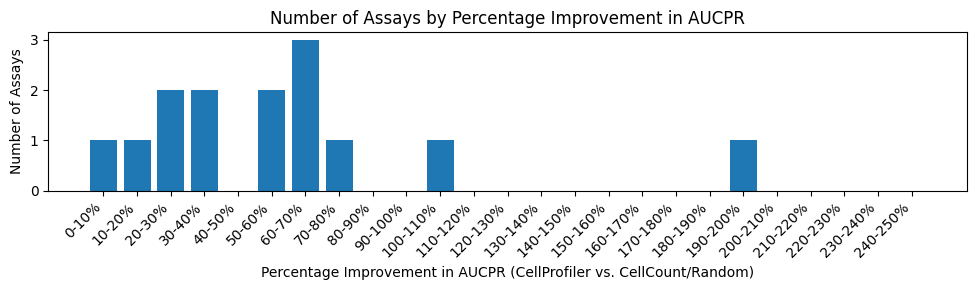

In [5]:
import matplotlib.pyplot as plt

# Calculate percentage improvement for CellProfiler AUCPR compared to max of CellCount/Random AUCPR
cellprofiler_df["Percentage_Improvement"] = (
    (cellprofiler_df["AUCPR"] - cellprofiler_df["Max_CellCount_Random_AUCPR"]) / cellprofiler_df["Max_CellCount_Random_AUCPR"]
) * 100


cellprofiler_df = cellprofiler_df.groupby("Task").mean().reset_index()

# Bin percentage improvement into ranges
bins = range(0, 251, 10)  # Define bins from 0% to 250% in increments of 10%
cellprofiler_df["Improvement_Bin"] = pd.cut(cellprofiler_df["Percentage_Improvement"], bins)

# Count the number of assays in each bin
improvement_counts = cellprofiler_df["Improvement_Bin"].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 3))
plt.bar(
    [f"{int(interval.left)}-{int(interval.right)}%" for interval in improvement_counts.index],
    improvement_counts.values,
)
plt.xlabel("Percentage Improvement in AUCPR (CellProfiler vs. CellCount/Random)")
plt.ylabel("Number of Assays")
plt.title("Number of Assays by Percentage Improvement in AUCPR")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


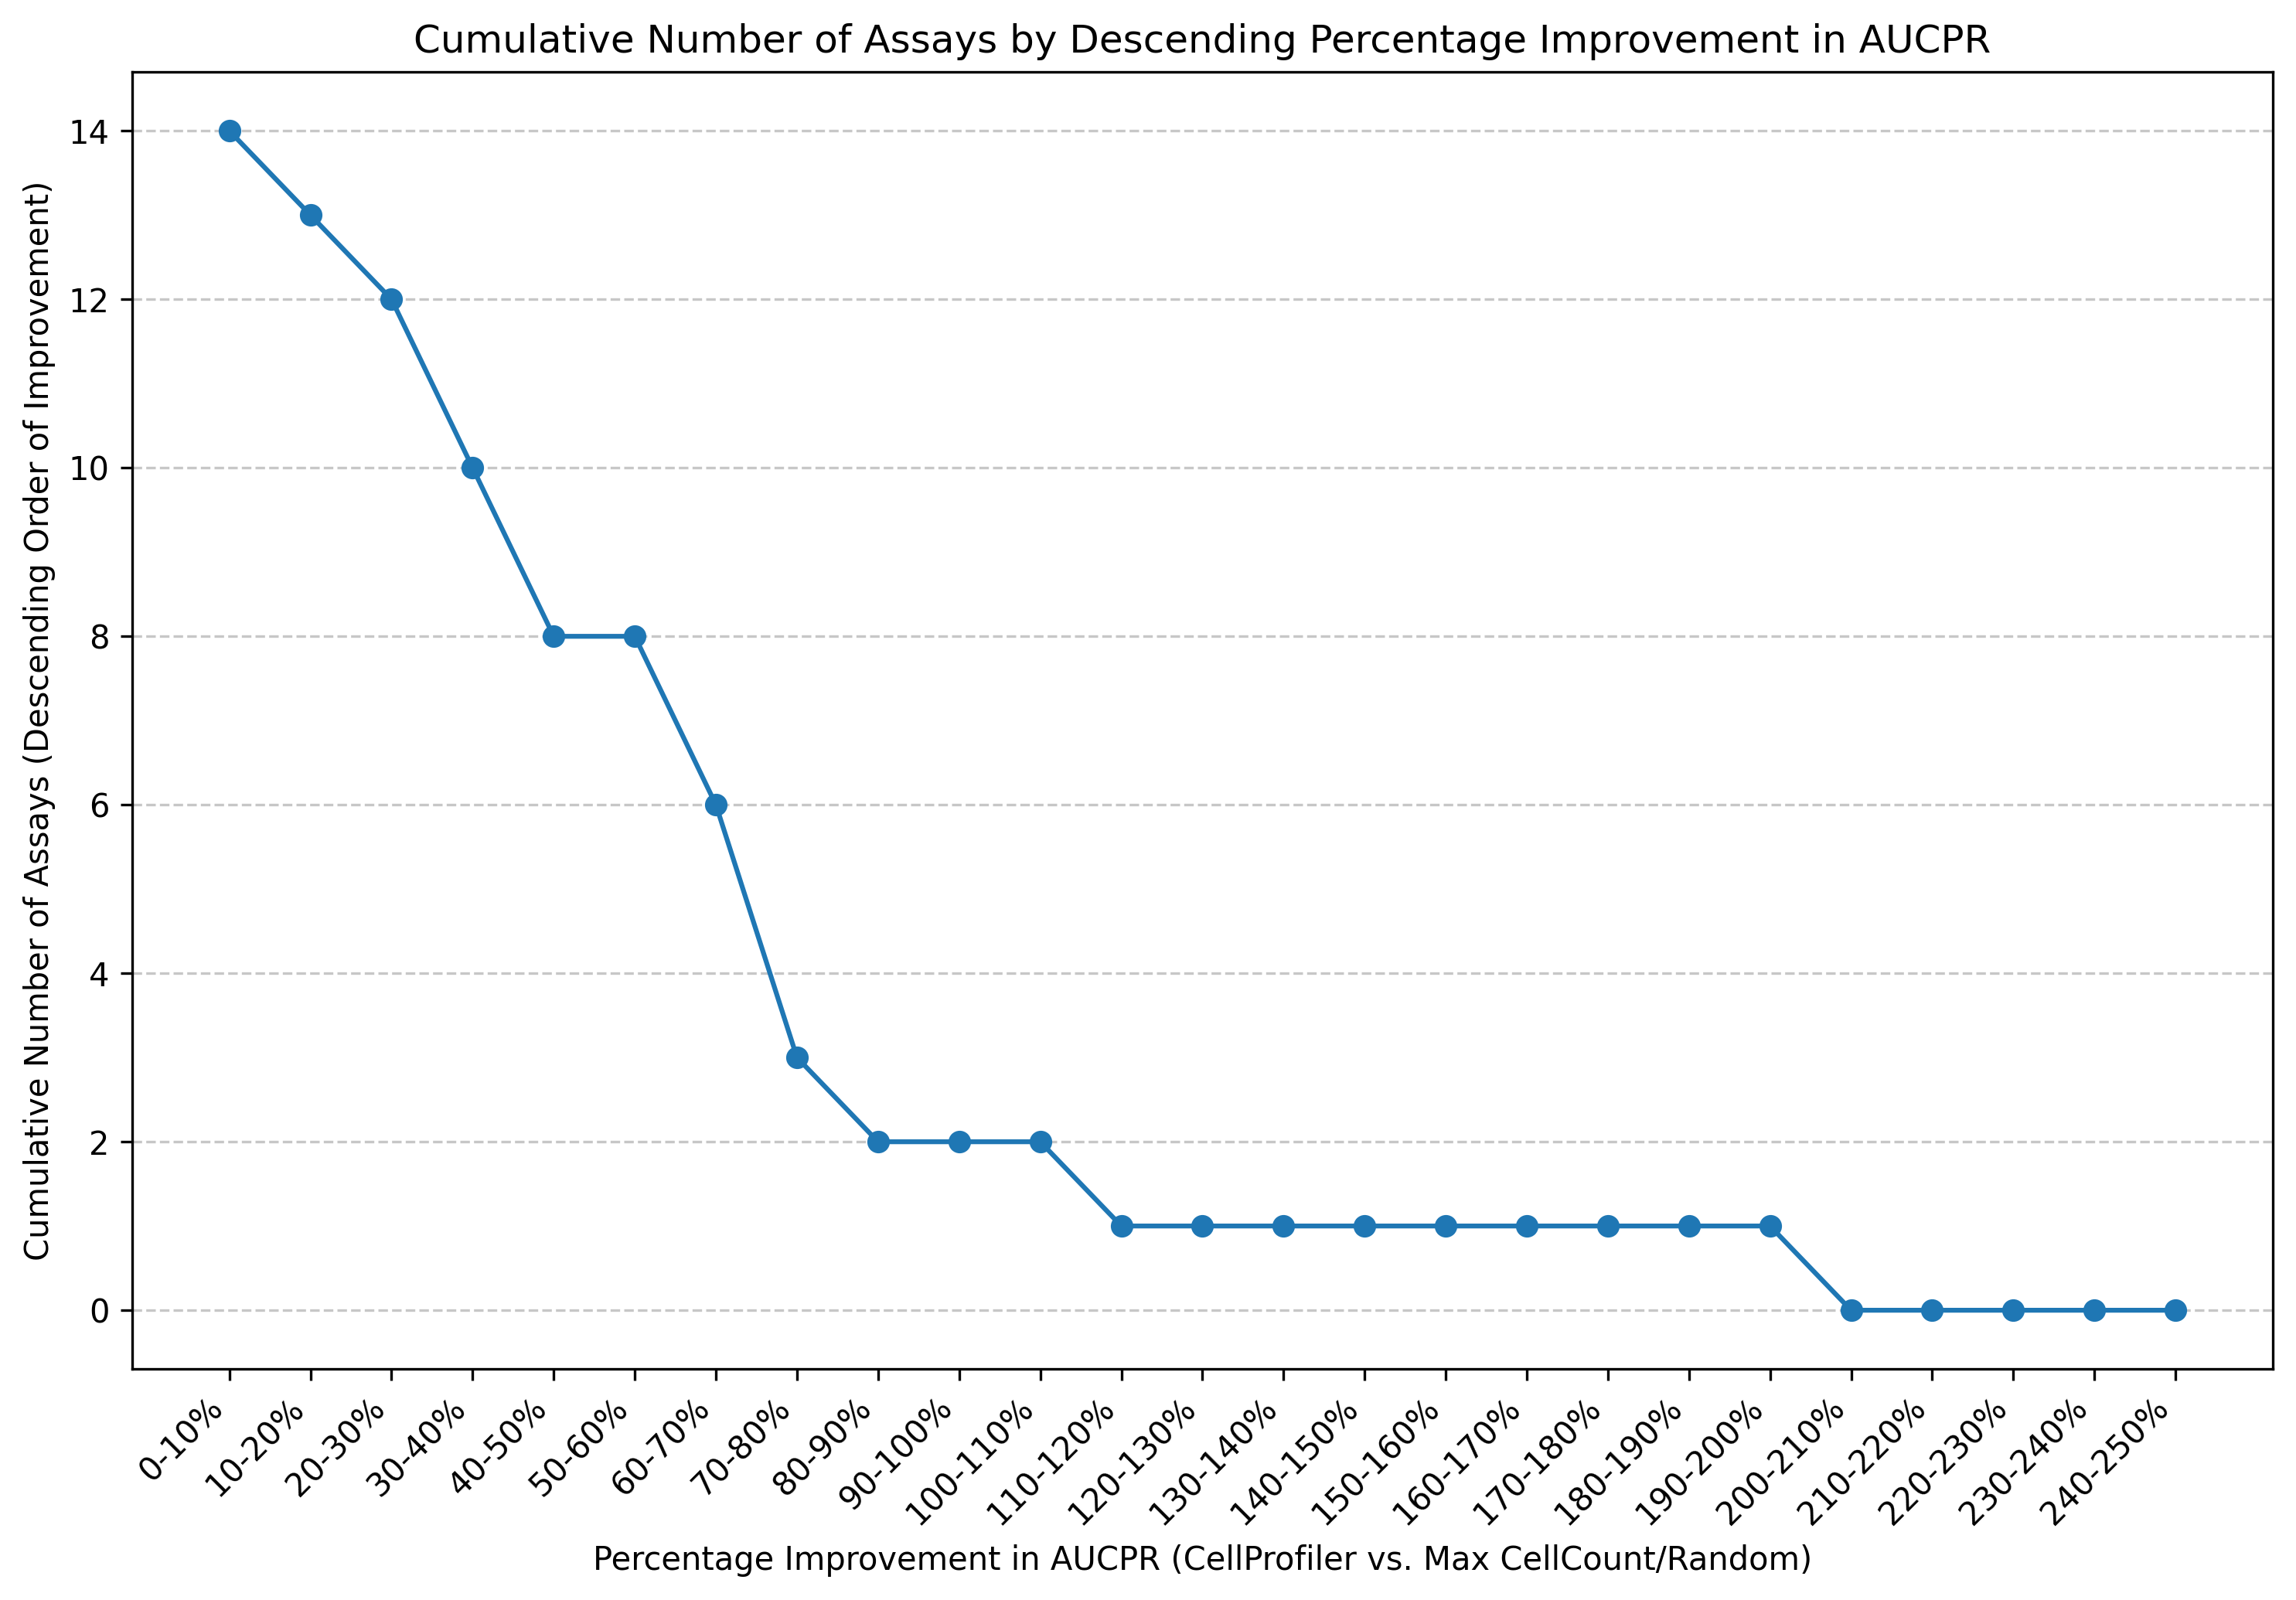

In [6]:
# Sort data for cumulative count starting from highest percentage improvement (100% to 0%)
reverse_cumulative_improvement = improvement_counts[::-1].cumsum()

# Line plot for reverse cumulative count of assays
plt.figure(figsize=(10, 7), dpi=300)
plt.plot(
    [f"{int(interval.left)}-{int(interval.right)}%" for interval in reverse_cumulative_improvement.index][::-1],
    reverse_cumulative_improvement.values[::-1],
    marker='o',
    linestyle='-'
)
plt.xlabel("Percentage Improvement in AUCPR (CellProfiler vs. Max CellCount/Random)")
plt.ylabel("Cumulative Number of Assays (Descending Order of Improvement)")
plt.title("Cumulative Number of Assays by Descending Percentage Improvement in AUCPR")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [7]:
cellprofiler_df

,Task,Fold,AUC,Optimal Threshold,Optimal Kappa,Kappa,Kappa @ 0.50,Balanced Accuracy,AUCPR,Sensitivity,...,Total Actives Test,Total Inactives Test,Total Compounds Test,Scrambled Kappa,Scrambled Balanced Accuracy,Random_AUCPR,Max_CellCount_Random_AUCPR,Better_AUCPR,Percentage_Improvement,Improvement_Bin
0,CHEMBL1741321,2.0,0.654212,0.373737,0.244713,0.206017,0.165757,0.602408,0.471699,0.425213,...,73.666667,196.666667,270.333333,0.016943,0.506150,0.272502,0.361986,1.000000,30.525249,"(30.0, 40.0]"
1,CHEMBL1741322,2.0,0.579121,0.515152,0.166320,0.110787,0.148911,0.555044,0.591551,0.562470,...,133.333333,112.000000,245.333333,0.103515,0.550205,0.543477,0.621199,0.666667,-1.524427,NaN
2,CHEMBL1741323,2.0,0.795529,0.461279,0.515687,0.506534,0.494432,0.750430,0.748344,0.675758,...,110.000000,162.000000,272.000000,-0.031691,0.486289,0.404412,0.445687,1.000000,68.577845,"(60.0, 70.0]"
3,CHEMBL1741324,2.0,0.675921,0.400673,0.260645,0.240144,0.151367,0.628467,0.477995,0.608673,...,87.666667,163.000000,250.666667,0.022683,0.509735,0.349732,0.364954,1.000000,31.026994,"(30.0, 40.0]"
4,CHEMBL1741325,2.0,0.793929,0.424242,0.491045,0.477652,0.486027,0.737942,0.667433,0.642857,...,84.000000,171.666667,255.666667,0.012108,0.504720,0.328554,0.412269,1.000000,64.177231,"(60.0, 70.0]"
5,CHEMBL1909087,2.0,0.768618,0.134680,0.211447,0.207813,0.000000,0.741524,0.207321,0.702381,...,7.666667,106.333333,114.000000,0.000000,0.500000,0.067251,0.237003,0.666667,55.443536,"(50.0, 60.0]"
6,CHEMBL1909089,2.0,0.685351,0.188552,0.200871,0.137580,0.000000,0.603235,0.142641,0.303571,...,7.333333,106.666667,114.000000,0.000000,0.500000,0.064327,0.177939,0.666667,25.664788,"(20.0, 30.0]"
7,CHEMBL1909104,2.0,0.765576,0.228956,0.259340,0.126646,-0.005281,0.575850,0.229987,0.208333,...,8.333333,105.666667,114.000000,0.000000,0.500000,0.073099,0.240055,0.666667,73.344255,"(70.0, 80.0]"
8,CHEMBL1909105,2.0,0.813744,0.212121,0.225563,0.252009,0.104311,0.673388,0.290175,0.435185,...,8.333333,105.666667,114.000000,0.000000,0.500000,0.073099,0.099344,1.000000,195.737116,"(190.0, 200.0]"
9,CHEMBL1909141,2.0,0.744621,0.175084,0.166193,0.137585,0.000000,0.586243,0.204241,0.296296,...,9.000000,105.000000,114.000000,0.000000,0.500000,0.078947,0.394661,0.333333,-10.921649,NaN


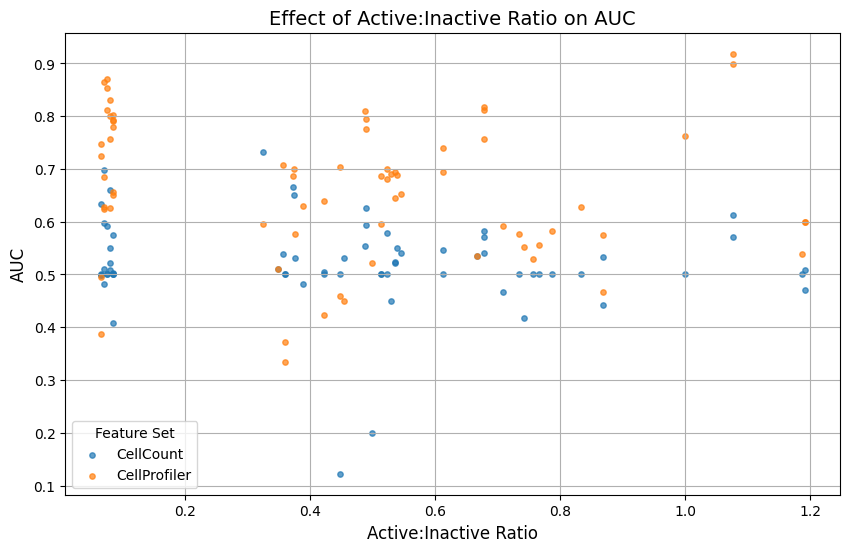

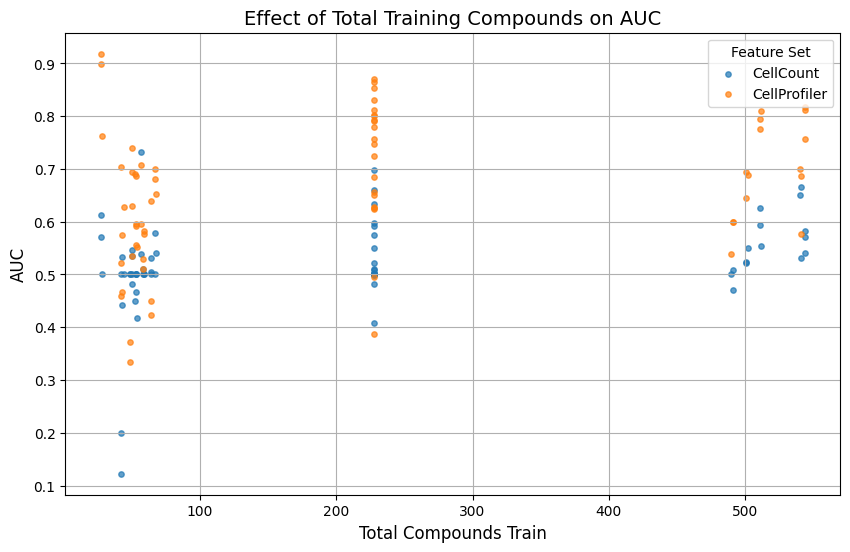

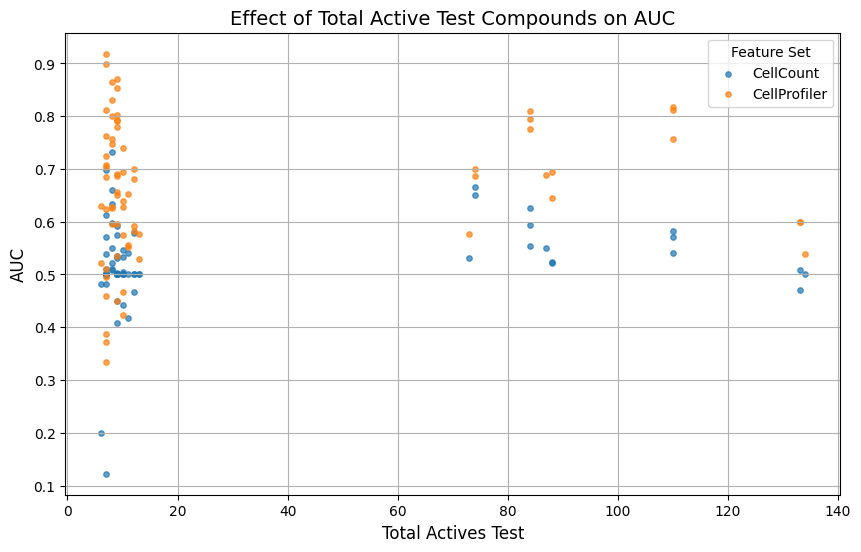

In [32]:
df = auc_df

# Adding a column for the ratio of actives to inactives in training data
df['Active:Inactive Ratio'] = df['Total Actives Train'] / df['Total Inactives Train']

# Plotting the relationship between Active:Inactive Ratio and AUC for each feature set
plt.figure(figsize=(10, 6))
for feature_set in df['Feature Set'].unique():
    subset = df[df['Feature Set'] == feature_set]
    plt.scatter(subset['Active:Inactive Ratio'], subset['AUC'], label=feature_set, s=15, alpha=0.7)

plt.title("Effect of Active:Inactive Ratio on AUC", fontsize=14)
plt.xlabel("Active:Inactive Ratio", fontsize=12)
plt.ylabel("AUC", fontsize=12)
plt.legend(title="Feature Set", fontsize=10)
plt.grid(True)
plt.show()

# Plotting the relationship between total training compounds and AUC for each feature set
plt.figure(figsize=(10, 6))
for feature_set in df['Feature Set'].unique():
    subset = df[df['Feature Set'] == feature_set]
    plt.scatter(subset['Total Compounds Train'], subset['AUC'], label=feature_set, s=15, alpha=0.7)

plt.title("Effect of Total Training Compounds on AUC", fontsize=14)
plt.xlabel("Total Compounds Train", fontsize=12)
plt.ylabel("AUC", fontsize=12)
plt.legend(title="Feature Set", fontsize=10)
plt.grid(True)
plt.show()

# Plotting the relationship between total training compounds and AUC for each feature set
plt.figure(figsize=(10, 6))
for feature_set in df['Feature Set'].unique():
    subset = df[df['Feature Set'] == feature_set]
    plt.scatter(subset['Total Actives Test'], subset['AUC'], label=feature_set, s=15, alpha=0.7)

plt.title("Effect of Total Active Test Compounds on AUC", fontsize=14)
plt.xlabel("Total Actives Test", fontsize=12)
plt.ylabel("AUC", fontsize=12)
plt.legend(title="Feature Set", fontsize=10)
plt.grid(True)
plt.show()

In [9]:
summary_stats

,Task,Feature Set,mean,std,count
0,CHEMBL1741321,CellCount,0.616698,0.073627,3
1,CHEMBL1741321,CellProfiler,0.654212,0.067983,3
2,CHEMBL1741322,CellCount,0.492806,0.020201,3
3,CHEMBL1741322,CellProfiler,0.579121,0.035574,3
4,CHEMBL1741323,CellCount,0.564581,0.021888,3
5,CHEMBL1741323,CellProfiler,0.795529,0.033683,3
6,CHEMBL1741324,CellCount,0.531933,0.015610,3
7,CHEMBL1741324,CellProfiler,0.675921,0.026344,3
8,CHEMBL1741325,CellCount,0.591339,0.036271,3
9,CHEMBL1741325,CellProfiler,0.793929,0.016745,3


In [29]:
summary_stats.Task.nunique()

23

In [10]:
overall_comparison

,Feature Set,mean,std
0,CellCount,0.520994,0.087289
1,CellProfiler,0.661365,0.132064


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CellCount v.s. CellProfiler: t-test independent samples with Bonferroni correction, P_val=1.415e-09 stat=-6.499e+00


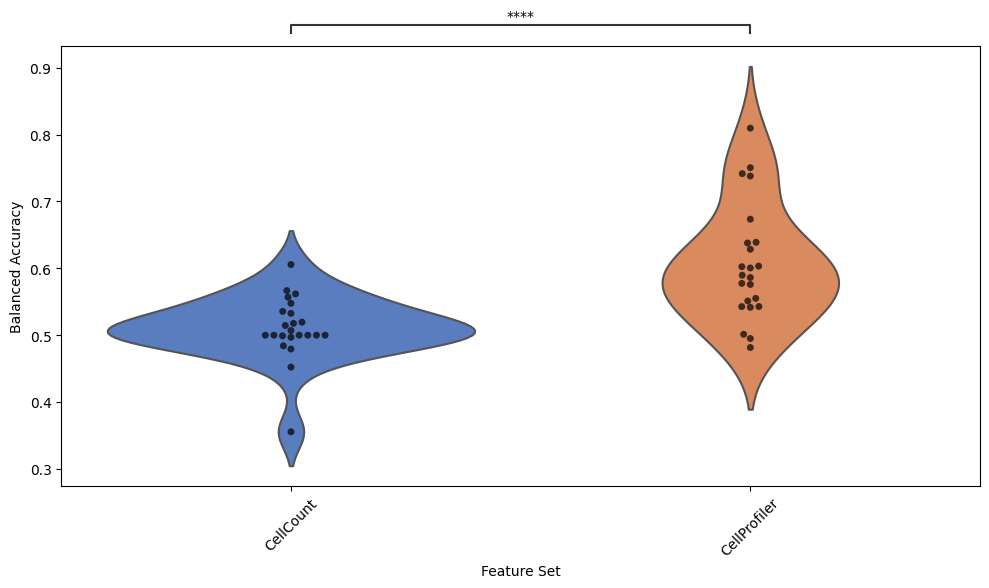

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation


# Create the violin plot with swarm overlay
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x="Feature Set", y="Balanced Accuracy", data=auc_df.groupby(["Task","Feature Set"]).mean().reset_index(), inner=None, palette="muted")
sns.swarmplot(x="Feature Set", y="Balanced Accuracy", data=auc_df.groupby(["Task","Feature Set"]).mean().reset_index(), color="k", alpha=0.7)

# Add statistical annotations
add_stat_annotation(ax, data=auc_df, x="Feature Set", y="Balanced Accuracy",
                    box_pairs=[("CellCount", "CellProfiler")],
                    test="t-test_ind", text_format="star", loc="outside", verbose=2)

# Customize the plot
plt.xlabel("Feature Set")
plt.ylabel("Balanced Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CellCount v.s. CellProfiler: t-test independent samples with Bonferroni correction, P_val=1.533e-11 stat=-7.366e+00


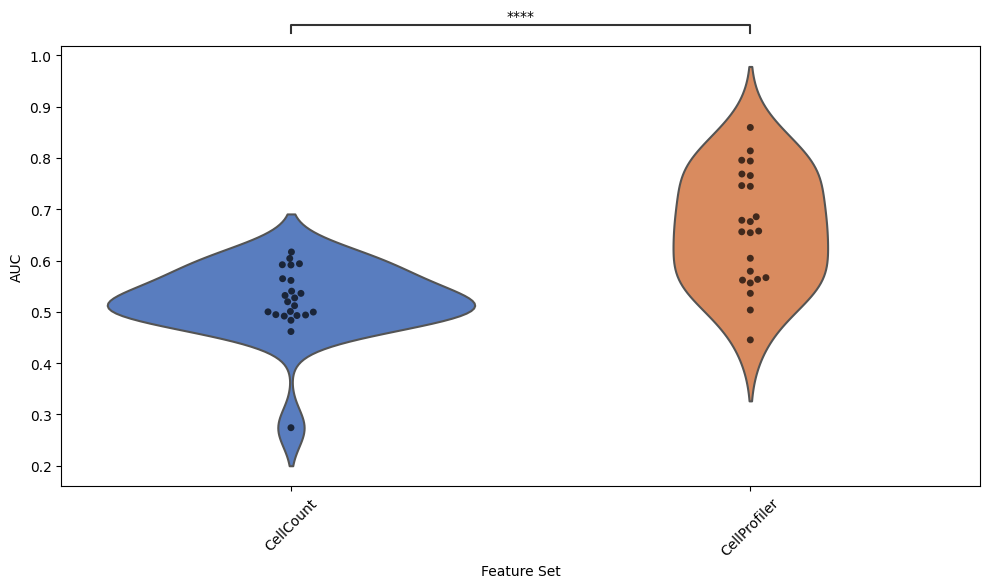

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation


# Create the violin plot with swarm overlay
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x="Feature Set", y="AUC", data=auc_df.groupby(["Task","Feature Set"]).mean().reset_index(), inner=None, palette="muted")
sns.swarmplot(x="Feature Set", y="AUC", data=auc_df.groupby(["Task","Feature Set"]).mean().reset_index(), color="k", alpha=0.7)

# Add statistical annotations
add_stat_annotation(ax, data=auc_df, x="Feature Set", y="AUC",
                    box_pairs=[("CellCount", "CellProfiler")],
                    test="t-test_ind", text_format="star", loc="outside", verbose=2)

# Customize the plot
plt.xlabel("Feature Set")
plt.ylabel("AUC")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
meta = pd.read_csv("assays_description_v2.csv")
meta

,Unnamed: 0,assay_chembl_id,gene_symbol,assay_description,assay_short_desc,assay_type,cell_line
0,0,CHEMBL1741321,CYP2D6,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,Cytochrome panel,F,in vitro
1,1,CHEMBL1741322,CYP1A2,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,Cytochrome panel,F,in vitro
2,2,CHEMBL1741323,CYP2C19,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,Cytochrome panel,F,in vitro
3,3,CHEMBL1741324,CYP3A4,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,Cytochrome panel,F,in vitro
4,4,CHEMBL1741325,CYP2C9,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,Cytochrome panel,F,in vitro
5,5,CHEMBL1909087,ADRA1D,DRUGMATRIX: Alpha-1D adrenergic receptor radio...,DrugMatrix in vitro pharmacology data,B,HEK293
6,6,CHEMBL1909089,ADRA2B,DRUGMATRIX: Alpha-2B adrenergic receptor radio...,DrugMatrix in vitro pharmacology data,B,CHO-K1
7,7,CHEMBL1909104,HTR2B,DRUGMATRIX: Serotonin (5-Hydroxytryptamine) 5-...,DrugMatrix in vitro pharmacology data,B,CHO-K1
8,8,CHEMBL1909105,HTR2C,DRUGMATRIX: Serotonin (5-Hydroxytryptamine) 5-...,DrugMatrix in vitro pharmacology data,B,CHO-K1
9,9,CHEMBL1909141,DRD3,DRUGMATRIX: Dopamine D3 radioligand binding (l...,DrugMatrix in vitro pharmacology data,B,CHO


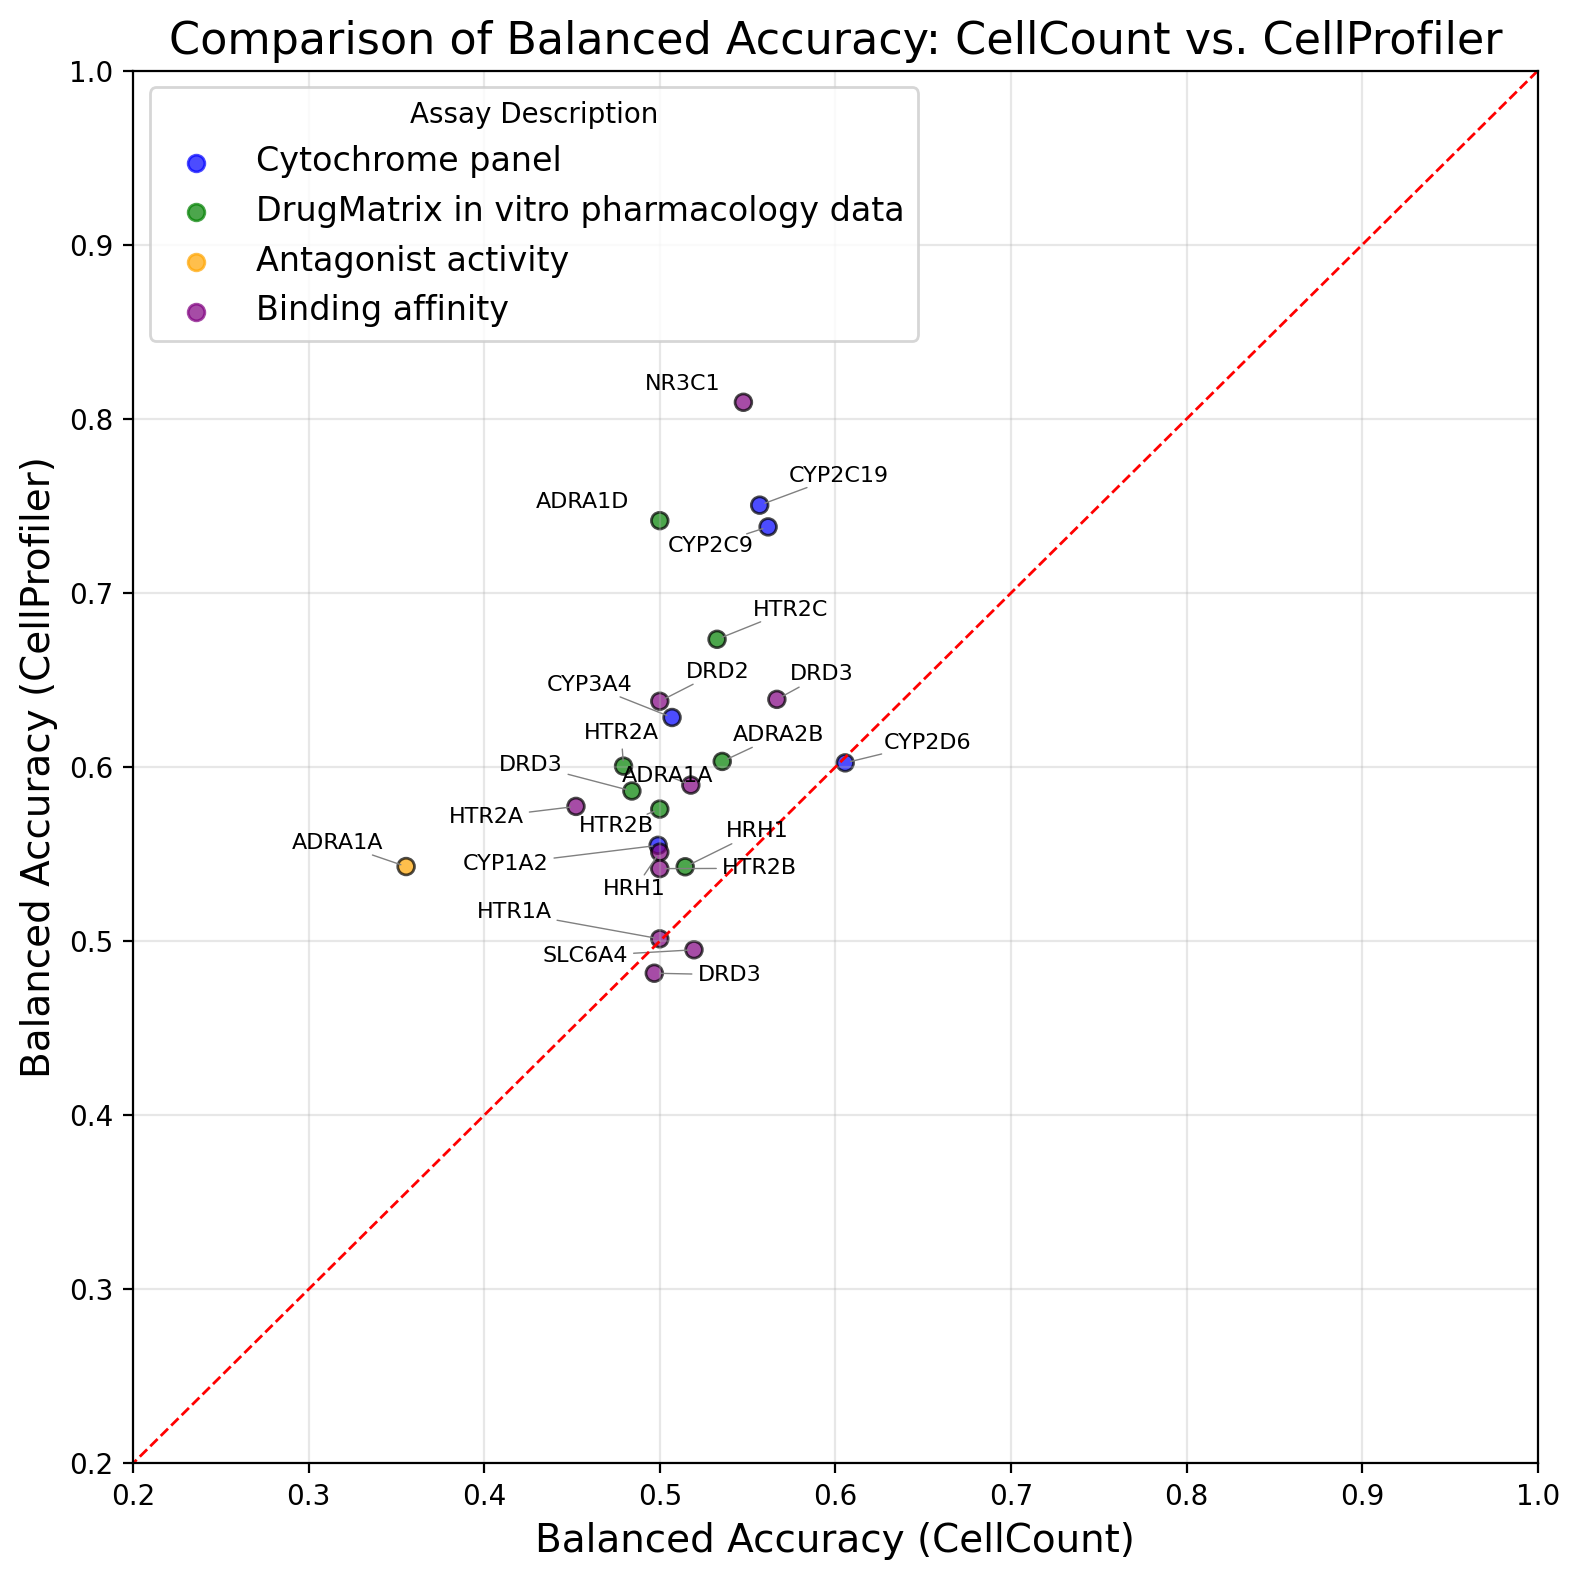

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

# Prepare the data
cellcount_data = auc_df[auc_df["Feature Set"] == "CellCount"].groupby(["Task","Feature Set"]).mean().reset_index()
cellprofiler_data = auc_df[auc_df["Feature Set"] == "CellProfiler"].groupby(["Task","Feature Set"]).mean().reset_index()

# Merge the data on Task
merged_data = pd.merge(
    cellcount_data, cellprofiler_data, on="Task", suffixes=("_CellCount", "_CellProfiler")
)

meta = pd.read_csv("assays_description_v2.csv")
merged_data = pd.merge(
    meta, merged_data, left_on="assay_chembl_id", right_on="Task", suffixes=("_CellCount", "_CellProfiler")
)


# Define a dictionary for custom categorical colors
category_colors = {
    "Cytochrome panel": "blue",
    "DrugMatrix in vitro pharmacology data": "green",
    "Antagonist activity": "orange",
    "Binding affinity": "purple"
}

# Map categories to colors
merged_data["AssayColor"] = merged_data["assay_short_desc"].map(category_colors)

# Create the scatter plot
plt.figure(figsize=(8, 8), dpi=200)
scatter = plt.scatter(
    merged_data["Balanced Accuracy_CellCount"], 
    merged_data["Balanced Accuracy_CellProfiler"], 
    c=merged_data["AssayColor"],  # Use the custom colors
    alpha=0.7,
    edgecolors="k"
)

# Add the x=y line
plt.plot([0, 1], [0, 1], color="red", linestyle="--", linewidth=1)

# Prepare text labels to adjust intelligently
texts = []
for i, row in merged_data.iterrows():
    texts.append(
        plt.text(
            row["Balanced Accuracy_CellCount"], 
            row["Balanced Accuracy_CellProfiler"], 
            row["gene_symbol"], 
            fontsize=8, 
            ha='right'
        )
    )

# Use adjustText to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# Add a legend for the categories
for category, color in category_colors.items():
    plt.scatter([], [], c=color, alpha=0.7, label=category)  # Dummy points for legend
plt.legend(title="Assay Description", fontsize=12)

# Customize the plot
plt.title("Comparison of Balanced Accuracy: CellCount vs. CellProfiler", fontsize=16)
plt.xlabel("Balanced Accuracy (CellCount)", fontsize=14)
plt.ylabel("Balanced Accuracy (CellProfiler)", fontsize=14)
plt.grid(alpha=0.3)
plt.xlim(0.2, 1)
plt.ylim(0.2, 1)
plt.tight_layout()
plt.show()


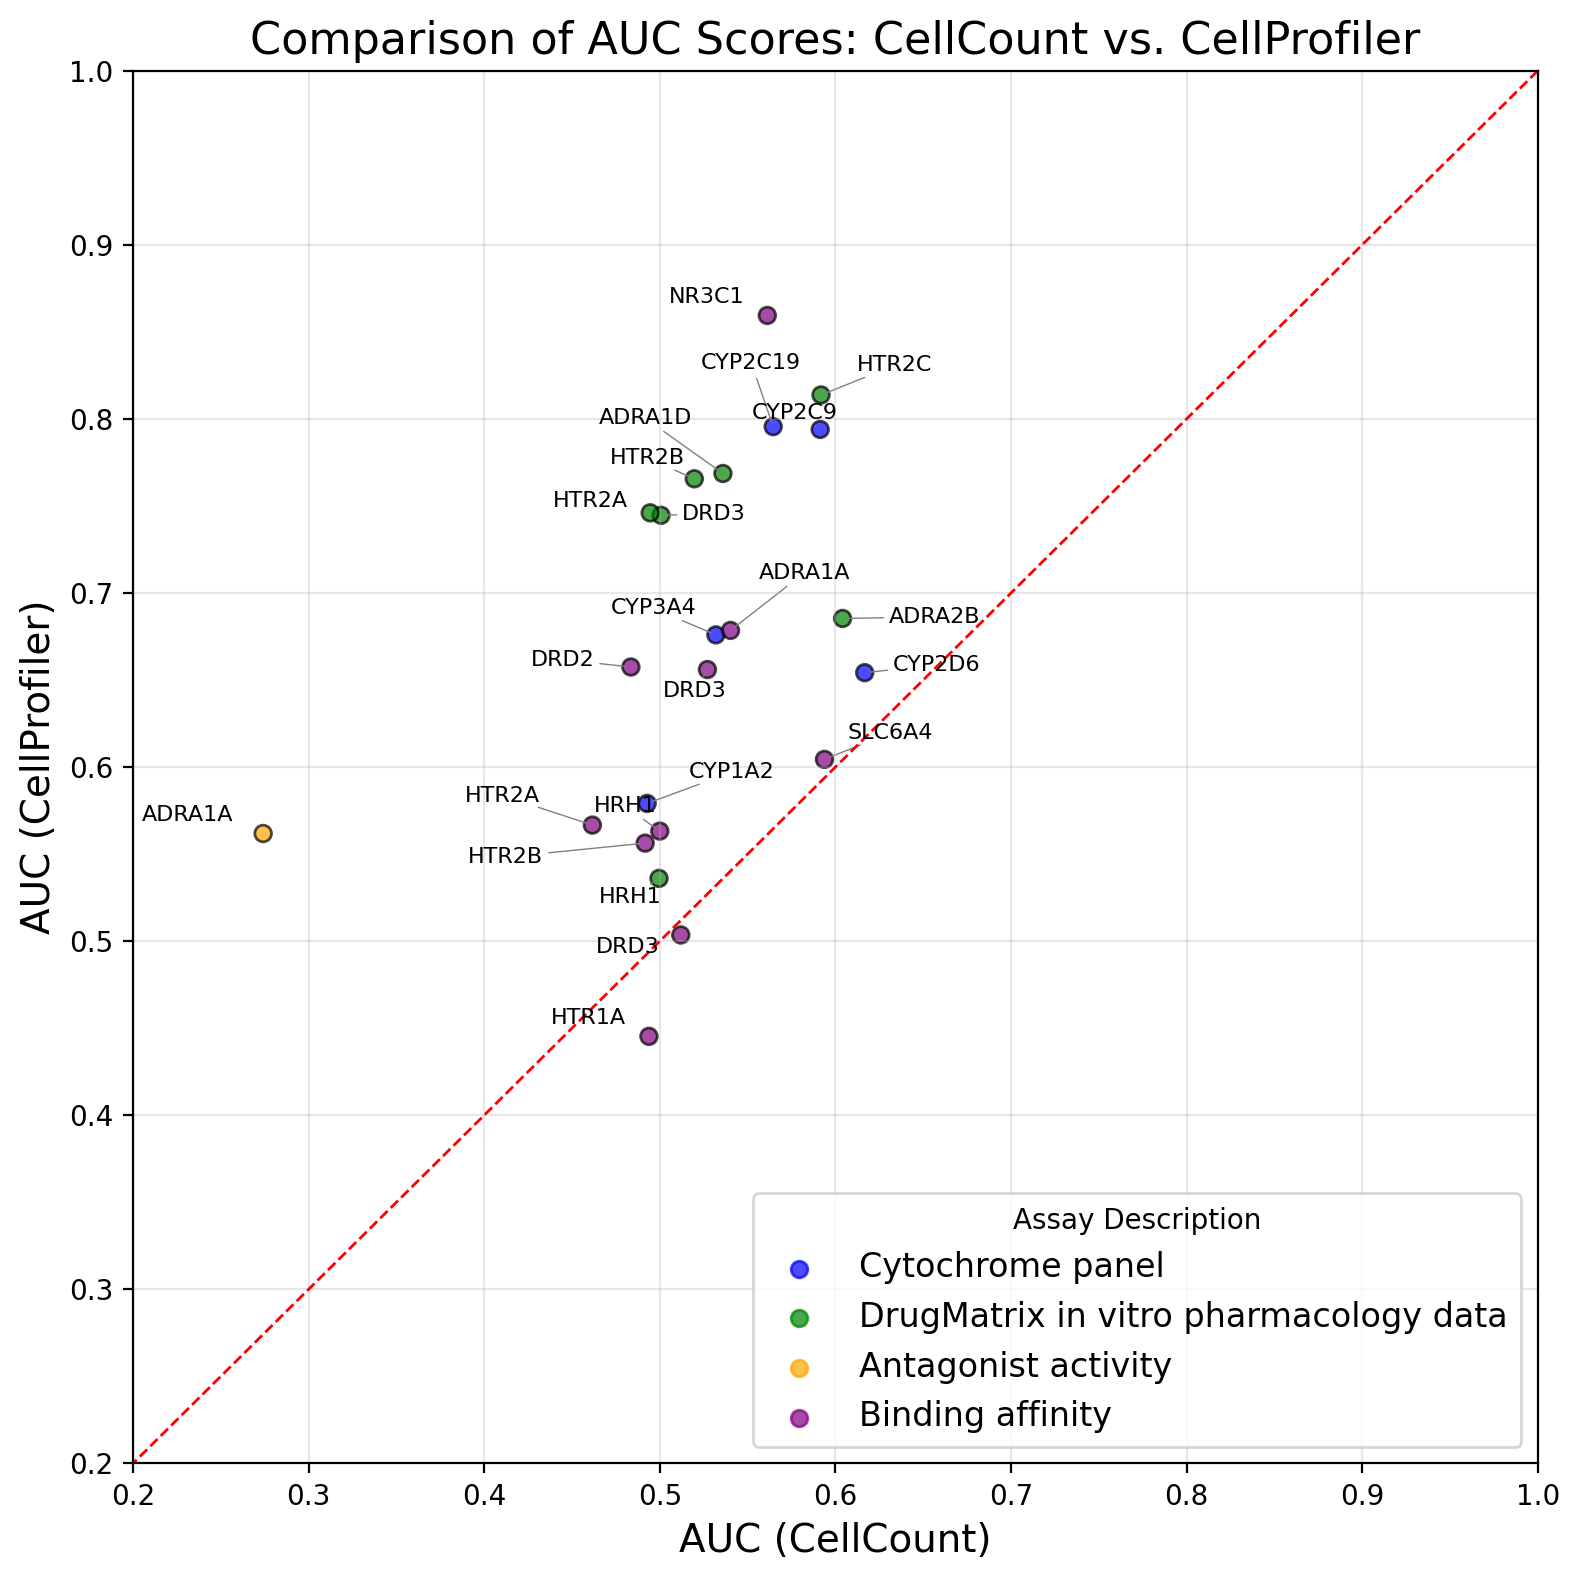

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
cellcount_data = auc_df[auc_df["Feature Set"] == "CellCount"].groupby(["Task","Feature Set"]).mean().reset_index()
cellprofiler_data = auc_df[auc_df["Feature Set"] == "CellProfiler"].groupby(["Task","Feature Set"]).mean().reset_index()

# Merge the data on Task
merged_data = pd.merge(
    cellcount_data, cellprofiler_data, on="Task", suffixes=("_CellCount", "_CellProfiler")
)

meta = pd.read_csv("assays_description_v2.csv")
merged_data = pd.merge(
    meta, merged_data, left_on="assay_chembl_id", right_on="Task", suffixes=("_CellCount", "_CellProfiler")
)


import matplotlib.pyplot as plt
from adjustText import adjust_text

# Define a dictionary for custom categorical colors
category_colors = {
    "Cytochrome panel": "blue",
    "DrugMatrix in vitro pharmacology data": "green",
    "Antagonist activity": "orange",
    "Binding affinity": "purple"
}

# Map categories to colors
merged_data["AssayColor"] = merged_data["assay_short_desc"].map(category_colors)

# Create the scatter plot
plt.figure(figsize=(8, 8), dpi=200)
scatter = plt.scatter(
    merged_data["AUC_CellCount"], 
    merged_data["AUC_CellProfiler"], 
    c=merged_data["AssayColor"],  # Use the custom colors
    alpha=0.7,
    edgecolors="k"
)

# Add the x=y line
plt.plot([0, 1], [0, 1], color="red", linestyle="--", linewidth=1)

# Prepare text labels to adjust intelligently
texts = []
for i, row in merged_data.iterrows():
    texts.append(
        plt.text(
            row["AUC_CellCount"], 
            row["AUC_CellProfiler"], 
            row["gene_symbol"], 
            fontsize=8, 
            ha='right'
        )
    )

# Use adjustText to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# Add a legend for the categories
for category, color in category_colors.items():
    plt.scatter([], [], c=color, alpha=0.7, label=category)  # Dummy points for legend
plt.legend(title="Assay Description", fontsize=12)

# Customize the plot
plt.title("Comparison of AUC Scores: CellCount vs. CellProfiler", fontsize=16)
plt.xlabel("AUC (CellCount)", fontsize=14)
plt.ylabel("AUC (CellProfiler)", fontsize=14)
plt.grid(alpha=0.3)
plt.xlim(0.2, 1)
plt.ylim(0.2, 1)
plt.tight_layout()
plt.show()


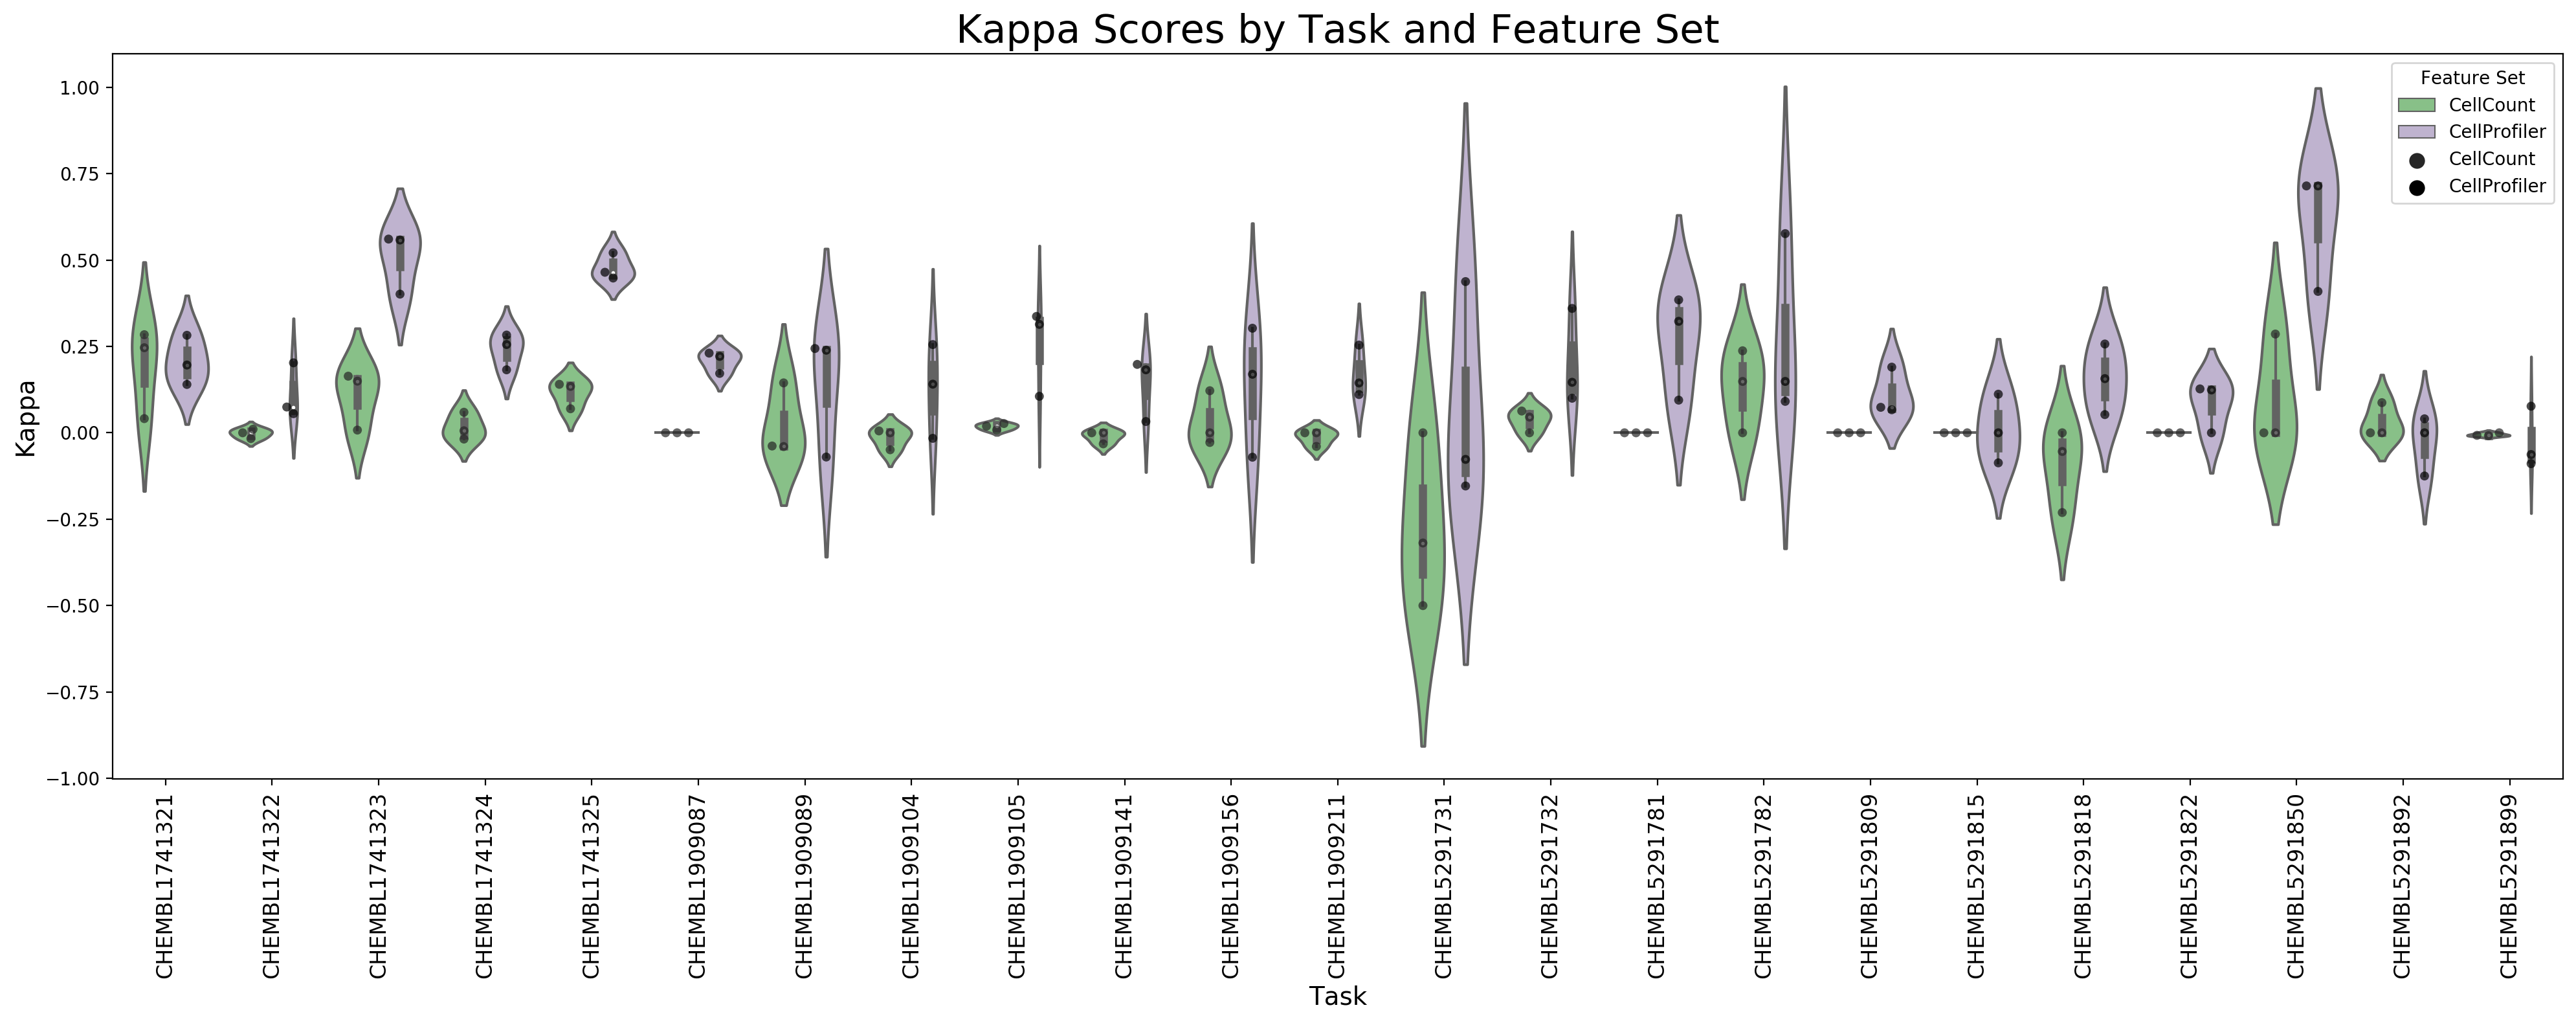

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create the violin plot with swarm overlay
plt.figure(figsize=(20, 8), dpi=200)
sns.violinplot(x="Task", y="Kappa", hue="Feature Set", data=auc_df, palette="Accent", dodge=True)
plt.legend(title="Feature Set", fontsize=12)

sns.swarmplot(x="Task", y="Kappa", hue="Feature Set", data=auc_df, color="k", alpha=0.7, dodge=True)

# Customize the plot
plt.title("Kappa Scores by Task and Feature Set", fontsize=22)
plt.xlabel("Task", fontsize=14)
plt.ylabel("Kappa", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()
